In [36]:
print("Hello")

Hello


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df= pd.read_csv("Social_Network_Ads.csv")

In [39]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [41]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [42]:
df.shape

(400, 5)

In [43]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

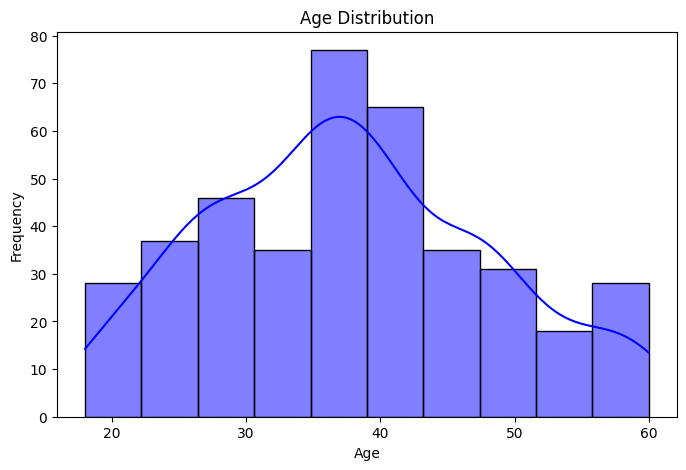

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=10, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15300\4183492972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


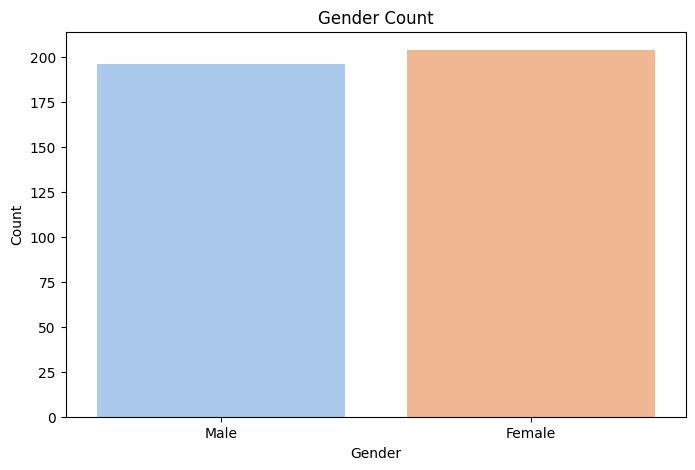

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


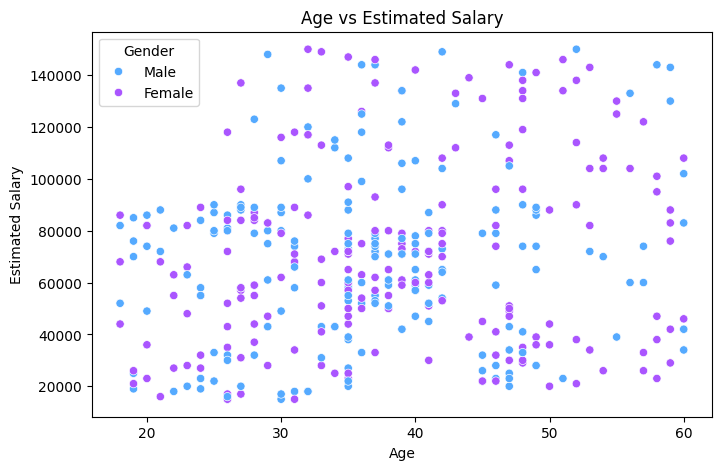

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Gender', data=df, palette='cool')
plt.title('Age vs Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()


In [47]:
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)


Gender
Female    204
Male      196
Name: count, dtype: int64


In [48]:
correlation = df[['Age', 'EstimatedSalary']].corr()
print(correlation)


                      Age  EstimatedSalary
Age              1.000000         0.155238
EstimatedSalary  0.155238         1.000000


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male=1, Female=0

# Define features and target
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Standardize numerical features
scaler = StandardScaler()
X[['Age', 'EstimatedSalary']] = scaler.fit_transform(X[['Age', 'EstimatedSalary']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data prepared!")


Training and testing data prepared!


C:\Users\user\AppData\Local\Temp\ipykernel_15300\2553396450.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'EstimatedSalary']] = scaler.fit_transform(X[['Age', 'EstimatedSalary']])


C:\Users\user\AppData\Local\Temp\ipykernel_15300\3490840848.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased', data=df, palette='cool')


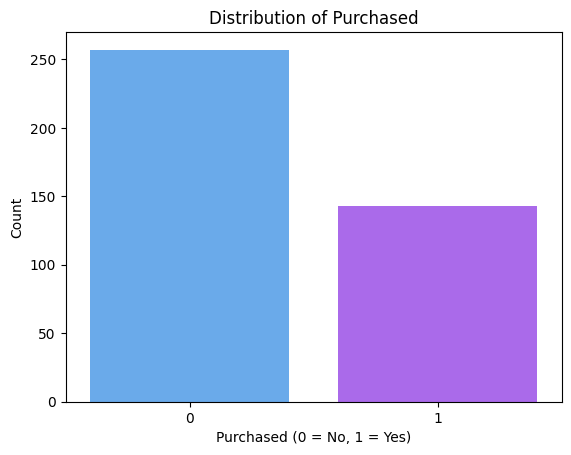

In [50]:
sns.countplot(x='Purchased', data=df, palette='cool')
plt.title('Distribution of Purchased')
plt.xlabel('Purchased (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Preprocessing
# Encode Gender (Male = 1, Female = 0)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Define features and target variable
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Standardize numerical features (Age and EstimatedSalary)
scaler = StandardScaler()
X[['Age', 'EstimatedSalary']] = scaler.fit_transform(X[['Age', 'EstimatedSalary']])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Naive Bayes Classifier
# ---------------------------
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluate Naive Bayes
print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# ---------------------------
# Random Forest Classifier
# ---------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


C:\Users\user\AppData\Local\Temp\ipykernel_15300\4020126327.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'EstimatedSalary']] = scaler.fit_transform(X[['Age', 'EstimatedSalary']])


Naive Bayes Performance:
Accuracy: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix:
 [[50  2]
 [ 3 25]]

Random Forest Performance:
Accuracy: 0.8875
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.83      0.86      0.84        28

    accuracy                           0.89        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80

Confusion Matrix:
 [[47  5]
 [ 4 24]]


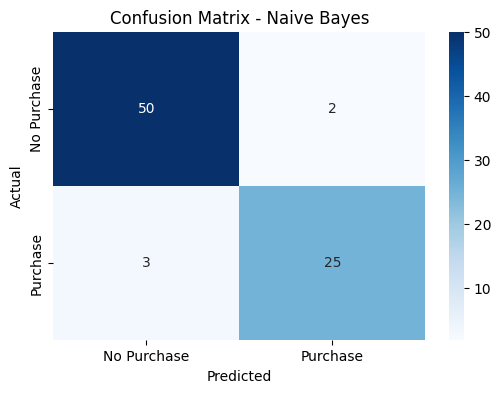

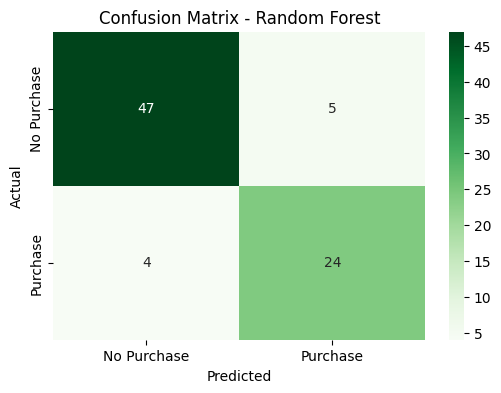

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


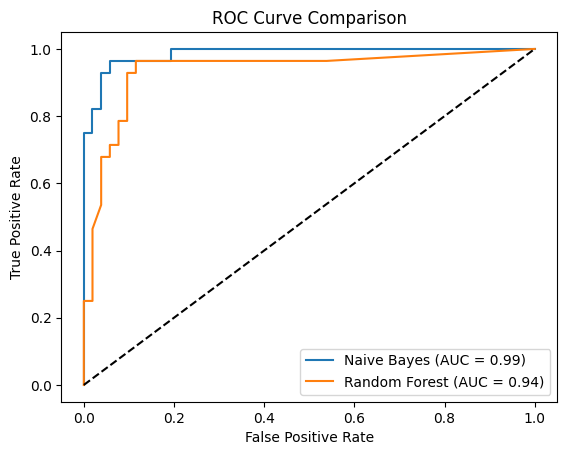

In [53]:
from sklearn.metrics import roc_curve, auc

# Naive Bayes ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
auc_nb = auc(fpr_nb, tpr_nb)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()


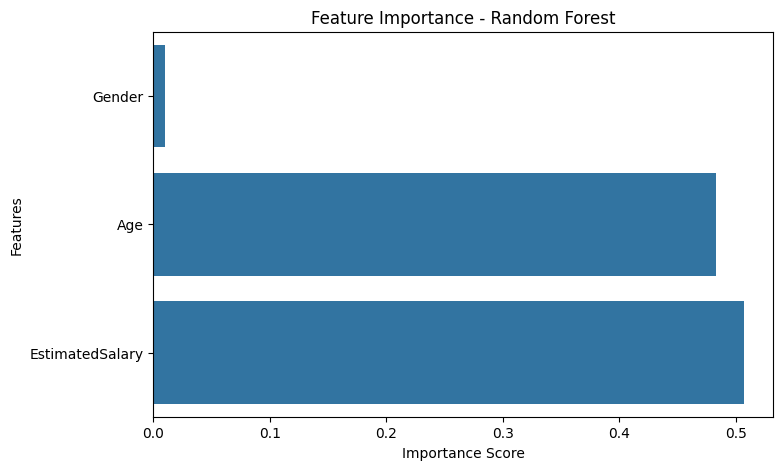

In [54]:
feature_importance = rf_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate tuned model
print("Accuracy after tuning:", accuracy_score(y_test, y_pred_best_rf))


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy after tuning: 0.9
